In [4]:
import numpy as np
import matplotlib.pyplot as plt

from edibles.utils.edibles_spectrum import EdiblesSpectrum


INPUT

In [5]:
FILE1 = "/HD170740/RED_860/HD170740_w860_redl_20140915_O12.fits"
FILE2 = "/HD170740/RED_860/HD170740_w860_redl_20140916_O12.fits"
FILE3 = "/HD170740/RED_860/HD170740_w860_redl_20150626_O12.fits"
FILE4 = "/HD170740/RED_860/HD170740_w860_redl_20160613_O12.fits"
FILE5 = "/HD170740/RED_860/HD170740_w860_redl_20170705_O12.fits"

In [6]:
sp1 = EdiblesSpectrum(FILE1)
subset1 = sp1.getSpectrum(xmin=7661.5, xmax=7669)
sigma1 = 0.005
# subset1.flux = subset1.flux / np.max(subset1.flux)

sp2 = EdiblesSpectrum(FILE2)
subset2 = sp2.getSpectrum(xmin=7661.5, xmax=7669)
sigma2 = 0.005
# subset2.flux = subset2.flux / np.max(subset2.flux)

sp3 = EdiblesSpectrum(FILE3)
subset3 = sp3.getSpectrum(xmin=7661.5, xmax=7669)
sigma3 = 0.005
# subset3.flux = subset3.flux / np.max(subset3.flux)

sp4 = EdiblesSpectrum(FILE4)
subset4 = sp4.getSpectrum(xmin=7661.5, xmax=7669)
sigma4 = 0.005
# subset4.flux = subset4.flux / np.max(subset4.flux)

sp5 = EdiblesSpectrum(FILE5)
subset5 = sp5.getSpectrum(xmin=7661.5, xmax=7669)
sigma5 = 0.005
# subset5.flux = subset5.flux / np.max(subset5.flux)

Text(0.5, 1.0, 'Real Data')

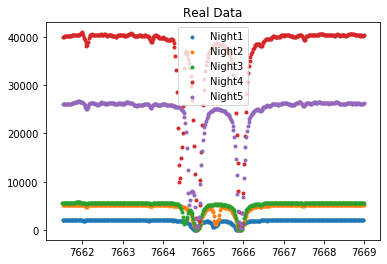

In [7]:
plt.figure()
plt.scatter(subset1.wave, subset1.flux, label="Night1", marker='.')
plt.scatter(subset2.wave, subset2.flux, label="Night2", marker='.')
plt.scatter(subset3.wave, subset3.flux, label="Night3", marker='.')
plt.scatter(subset4.wave, subset4.flux, label="Night4", marker='.')
plt.scatter(subset5.wave, subset5.flux, label="Night5", marker='.')
plt.legend()
plt.title('Real Data')

In [8]:
x = [7664.809006083383, 7665.257231340846, 7665.868447601023, 7664.835169974964, 7665.303461974108, 7665.9142776251665, 7664.532588055943, 7664.853624166611, 7665.917056283197, 7664.410883406029, 7664.872617337293, 7665.936612918032, 7664.6539875266635, 7664.85378771173, 7665.932708711083]

In [9]:
y = [-28.273558, -28.273558, -28.273558, -28.451855, -28.451855, -28.451855, 2.167503, 2.167503, 2.167503, 7.437444, 7.437444, 7.437444, -2.532284, -2.532284, -2.532284]

In [23]:
classification = ['blue','red','blue','blue','red','blue','red','blue','blue','red','blue','blue','red','blue','blue']

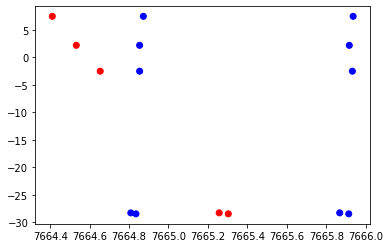

In [24]:
plt.scatter(x,y, c=classification)

In [31]:
X = np.column_stack((x,y))
print(X)
y = [0,1,0,0,1,0,1,0,0,1,0,0,1,0,0]


[[ 7.66480901e+03 -2.82735580e+01]
 [ 7.66525723e+03 -2.82735580e+01]
 [ 7.66586845e+03 -2.82735580e+01]
 [ 7.66483517e+03 -2.84518550e+01]
 [ 7.66530346e+03 -2.84518550e+01]
 [ 7.66591428e+03 -2.84518550e+01]
 [ 7.66453259e+03  2.16750300e+00]
 [ 7.66485362e+03  2.16750300e+00]
 [ 7.66591706e+03  2.16750300e+00]
 [ 7.66441088e+03  7.43744400e+00]
 [ 7.66487262e+03  7.43744400e+00]
 [ 7.66593661e+03  7.43744400e+00]
 [ 7.66465399e+03 -2.53228400e+00]
 [ 7.66485379e+03 -2.53228400e+00]
 [ 7.66593271e+03 -2.53228400e+00]]


In [33]:
from IPython.display import clear_output
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score
import numpy as np
import torch
import pandas as pd
from sklearn.datasets import make_blobs, make_circles
import collections
%matplotlib inline

def live_plot(X, y, figsize=(7,5), title=''):
    clear_output(wait=True)
    plt.figure(figsize=figsize)
    plt.scatter(X[y==0].T[0], X[y==0].T[1], color='red')
    plt.scatter(X[y==1].T[0], X[y==1].T[1], color='blue')
    plt.title(title)
    plt.show();

In [38]:
import time
start_one = time.time()

class OneHiddenLayer(torch.nn.Module):
    
    def __init__(self, input_size, num_classes):
        
        super().__init__()
        
        # Neural Network Architecture
        self.dense1 = torch.nn.Linear(in_features=num_features, out_features=400)
        self.activation1 = torch.nn.LogSigmoid()
        self.dense2 = torch.nn.Linear(in_features=400, out_features=num_classes)
        self.activation2 = torch.nn.LogSigmoid()
        
    def forward(self, X):
        X = self.dense1(X)
        X = self.activation1(X)
        X = self.dense2(X)
        X = self.activation2(X)
        return X

In [39]:
max_iter = 100
model = OneHiddenLayer(num_features, num_classes)
optimizer = torch.optim.SGD(model.parameters(), lr=1e-2)
criterion = torch.nn.CrossEntropyLoss()

loss_list_one = []
accuracy_list_one = []
valid_list_one = []

for i in range(max_iter):
    epoch_loss = 0
    for index, (data, label) in enumerate(train_dataset):
        data = data.view(batch_size, -1)
        optimizer.zero_grad()
        y_pred = model(data)
        loss = criterion(input=y_pred, target=label)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()
        print(f"Batch loss ({index+1}/{batch_limit}): {loss.item()}", end='\r')
        if index >= batch_limit -1:
            break
    with torch.no_grad():
        loss_list_one.append(epoch_loss/batch_limit)
        y_pred = model.forward(torch.Tensor(train_data_np.reshape(-1, num_features)))
        y_pred = torch.argmax(y_pred, dim=1).detach().numpy()
        accuracy_list_one.append(accuracy_score(y_true=train_labels, y_pred=y_pred)*100)
        y_pred_val = model.forward(torch.Tensor(valid_data_np.reshape(-1, num_features)))
        y_pred_val = torch.argmax(y_pred_val, dim=1).detach().numpy()
        valid_list_one.append(accuracy_score(y_true=valid_labels, y_pred=y_pred_val)*100)
        live_plot(np.array(loss_list_one), 
                  np.array(accuracy_list_one), 
                  valid_list_one, 
                  title=f"Loss at epoch {i}: {loss.item():.4f}") 

        
stop_one = time.time()
total_time_one = stop_one - start_one
print(total_time_one) 

NameError: name 'train_dataset' is not defined

In [ ]:
with torch.no_grad():
    y_pred = model.forward(Xt)
    y_pred = torch.argmax(y_pred, dim=1).detach().numpy()
    print(f"Classifier Accuracy: {accuracy_score(y_true=y, y_pred=y_pred) * 100}%")